# Análise Táxis NYC
Para começar a responder as perguntas propostas no desafio, começarei importando os datasets enviados juntamente com o desafio. 

### Inicialização
Usarei a biblioteca *Pandas* para realizar a importação em quatro dataframes distintos já que temos quatro arquivos separados por ano. Utilizarei as bibliotecas *Numpy* para algumas manipulações do dataframe e *Matplotlib* e *Seaborn* para apresentações gráficas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df2009 = pd.read_json('data-sample_data-nyctaxi-trips-2009-json_corrigido.json', lines=True, orient='columns')
df2010 = pd.read_json('data-sample_data-nyctaxi-trips-2010-json_corrigido.json', lines=True, orient='columns')
df2011 = pd.read_json('data-sample_data-nyctaxi-trips-2011-json_corrigido.json', lines=True, orient='columns')
df2012 = pd.read_json('data-sample_data-nyctaxi-trips-2012-json_corrigido.json', lines=True, orient='columns')

Primeiramente irei concatenar todos os 4 dataframes para um único dataframe que iremos utilizar para responder algumas perguntas. 

In [3]:
df4Years = pd.concat([df2009, df2010, df2011, df2012], ignore_index=True)

In [4]:
df4Years.head() 

dropoff_datetime  dropoff_latitude  dropoff_longitude  \
0  2009-04-21T18:57:09.433767+00:00         40.747950         -73.994712   
1  2009-01-13T07:50:36.386011+00:00         40.792385         -73.940449   
2  2009-01-06T19:43:09.908429+00:00         40.768108         -73.944535   
3  2009-09-24T08:41:56.739991+00:00         40.721812         -73.958122   
4  2009-10-29T05:57:22.880174+00:00         40.776075         -73.979757   

   fare_amount  passenger_count payment_type  \
0          5.4                2         Cash   
1         15.4                1         Cash   
2          6.1                5         CASH   
3         12.9                1         CASH   
4          7.7                1         CASH   

                    pickup_datetime  pickup_latitude  pickup_longitude  \
0  2009-04-21T18:51:11.767205+00:00        40.742950        -74.004114   
1  2009-01-13T07:40:07.639754+00:00        40.747784        -73.996506   
2  2009-01-06T19:30:44.142187+00:00        40.752070        -73.951340   
3  2009-09-24T08:28:09.004451+00:00        40.729128        -74.001117   
4  2009-10-29T05:50:39.214629+00:00        40.756873        -73.976600   

   rate_code  store_and_fwd_flag  surcharge  tip_amount  tolls_amount  \
0        NaN                 NaN        0.0         0.0           0.0   
1        NaN                 NaN        0.0         0.0           0.0   
2        NaN                 NaN        1.0         0.0           0.0   
3        NaN                 NaN        0.5         0.0           0.0   
4        NaN                 NaN        0.5         0.0           0.0   

   total_amount  trip_distance vendor_id  
0           5.4           0.80       CMT  
1          15.4           5.40       CMT  
2           7.1           1.67       VTS  
3          13.4           4.13       VTS  
4           8.2           2.03       VTS

In [5]:
df4Years.tail()

dropoff_datetime  dropoff_latitude  \
3999995   2012-07-02T02:24:36.05472+00:00         40.738477   
3999996  2012-04-11T16:30:46.179091+00:00          0.000000   
3999997  2012-09-15T15:08:10.313917+00:00         40.764069   
3999998  2012-06-25T09:31:07.322351+00:00         40.764176   
3999999  2012-08-24T07:38:33.870016+00:00         40.710155   

         dropoff_longitude  fare_amount  passenger_count payment_type  \
3999995         -73.987610         19.4                3         Cash   
3999996           0.000000          7.4                1         Cash   
3999997         -73.974005         10.6                4         Cash   
3999998         -73.988470          7.4                2       Credit   
3999999         -74.009790          7.8                1         Cash   

                          pickup_datetime  pickup_latitude  pickup_longitude  \
3999995   2012-07-02T02:16:07.72331+00:00        40.784441        -73.947063   
3999996  2012-04-11T16:24:49.255035+00:00         0.000000          0.000000   
3999997   2012-09-15T15:00:58.80813+00:00        40.743763        -74.006156   
3999998   2012-06-25T09:17:36.81712+00:00        40.783816        -73.979615   
3999999  2012-08-24T07:25:13.503063+00:00        40.731162        -73.988829   

         rate_code  store_and_fwd_flag  surcharge  tip_amount  tolls_amount  \
3999995        NaN                 NaN        0.0         0.0           0.0   
3999996        NaN                 NaN        0.0         0.0           0.0   
3999997        NaN                 NaN        0.0         0.0           0.0   
3999998        NaN                 NaN        0.0         2.0           0.0   
3999999        NaN                 NaN        0.0         0.0           0.0   

         total_amount  trip_distance vendor_id  
3999995          19.4            6.3       CMT  
3999996           7.4            1.8       CMT  
3999997          10.6            2.9       CMT  
3999998           9.4            1.7       CMT  
3999999           7.8            2.0       CMT

### Achando a distância média percorrida com no máximo 2 passageiros
Para a primeira questão, queremos saber a distância média percorrida por viagens com no máximo 2 passageiros.

Com isso em mente vamos primeiro fazer uma limpeza dos dataframes criados para outros dataframes retirando as informações que não serão necessárias para análise. 
Irei retirar as colunas de ***dropoff_datetime, fare_amount, payment_type, pickup_datetime, rate_code, store_and_fwd_flag, surcharge, tip_amount, tolls_amount, total_amount e vendor_id***. As colunas de latitude e longitude também serão retirtadas já que temos a coluna de ***trip_distance*** já com os dados de distância que utilizaremos para analisar. Sendo assim, iremos selecionar apenas as colunas ***trip_distance e passenger_count*** para o novo dataframe, para não afetar o dataframe original, separado apenas para a questão 01.

In [6]:
q1 = df4Years[['passenger_count', 'trip_distance']]
q1.head()

passenger_count  trip_distance
0                2           0.80
1                1           5.40
2                5           1.67
3                1           4.13
4                1           2.03

Precisamos filtrar o dataframe para apenas as corridas com no máximo 2 passageiros:

In [7]:
q1 = q1[q1['passenger_count'] <= 2]

In [8]:
q1.describe()

passenger_count  trip_distance
count     3.319652e+06   3.319652e+06
mean      1.219706e+00   2.662527e+00
std       4.143705e-01   3.112605e+00
min       0.000000e+00   0.000000e+00
25%       1.000000e+00   1.000000e+00
50%       1.000000e+00   1.680000e+00
75%       1.000000e+00   3.000000e+00
max       2.000000e+00   4.970000e+01

Como temos números 0 de passageiros e 0 distâcia percorrida em uma viagem, conforme visto no **min** mostrado na tabela acima, precisamos saber a quantidade para tratar esses valores.

In [9]:
q1['passenger_count'].value_counts()

1    2589416
2     729792
0        444
Name: passenger_count, dtype: int64

In [10]:
len(q1[q1['trip_distance'] == 0])

31480

A proporção entre as linhas com valores 0 e o total de linhas do dataframe é bem pequena, aproximadamente 32000 *entries* para 3 milhões *entries* totais (~ 1%), e por isso irei desconsiderar e remover essas linhas do dataframe para a análise.

In [11]:
q1 = q1[(q1[['trip_distance', 'passenger_count']] != 0).all(axis=1)]

In [12]:
q1.describe()

passenger_count  trip_distance
count     3.287772e+06   3.287772e+06
mean      1.221068e+00   2.688088e+00
std       4.149660e-01   3.116535e+00
min       1.000000e+00   2.000000e-03
25%       1.000000e+00   1.000000e+00
50%       1.000000e+00   1.700000e+00
75%       1.000000e+00   3.000000e+00
max       2.000000e+00   4.970000e+01

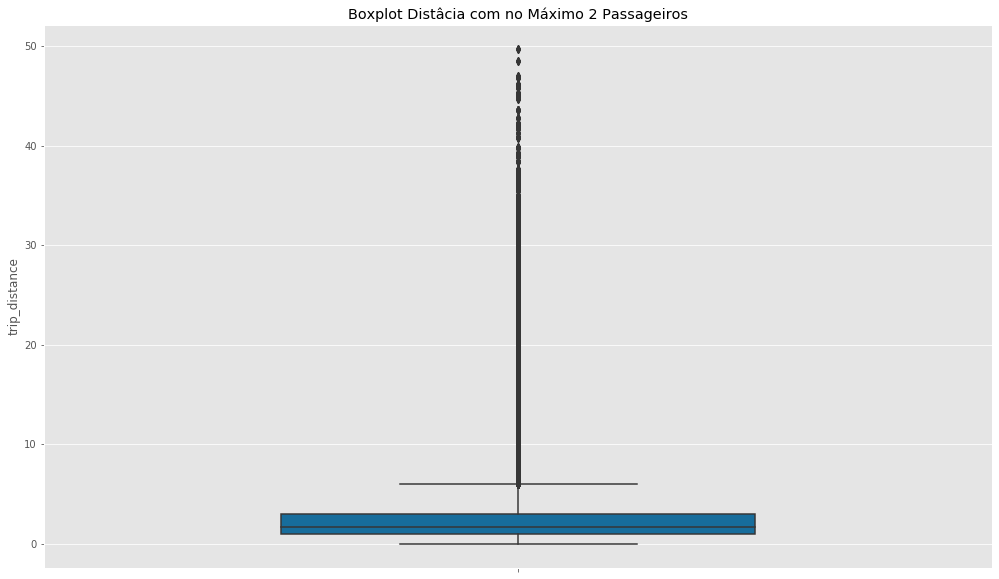

In [13]:
plt.figure(figsize=(17,10))
sns.boxplot(y='trip_distance',
            data=q1,
            palette="colorblind",
            width=0.5)
plt.title('Boxplot Distâcia com no Máximo 2 Passageiros')
plt.show()

Conforme mostrado pelo gráfico e pela tabela mostrada no *describe* conseguimos ver que a média percorrida pelos táxis com no máximo 2 passageiros é de **2,69 metros** aproximadamente. 

### Descobrindo os 3 maiores *vendors*
Para a segunda questão, seguiremos alguns passos semelhantes à primeira questão.

Faremos a separação dos dados somente necessários para análise deixando somente as colunas **vendor_id** e **total_amount**.

In [14]:
q2 = df4Years[['vendor_id', 'total_amount']]
q2.head()

vendor_id  total_amount
0       CMT           5.4
1       CMT          15.4
2       VTS           7.1
3       VTS          13.4
4       VTS           8.2

Para descobrir quem foi o maior *vendor* de NYC faremos um agrupamento por cada *vendor* e depois somar todos os valores adquiridos por corrida. Criarei uma função para poder reaproveitar na criação dos gráficos das outras resposta quando convir.

In [15]:
def plot_chart (x_title, y_title, chart_title):
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title)
    plt.show()

In [16]:
q2.groupby("vendor_id").sum().sort_values(by="total_amount", ascending=False)

total_amount
vendor_id              
CMT        1.954908e+07
VTS        1.904343e+07
DDS        2.714902e+06
TS         4.560000e+01

In [17]:
vendor_lookup = pd.read_csv('data-vendor_lookup-csv.csv')
vendor_lookup

vendor_id                               name                   address  \
0       CMT  Creative Mobile Technologies, LLC     950 4th Road Suite 78   
1       VTS                       VeriFone Inc             26 Summit St.   
2       DDS     Dependable Driver Service, Inc  8554 North Homestead St.   
3        TS                 Total Solutions Co    Five Boroughs Taxi Co.   
4        MT                          Mega Taxi       4 East Jennings St.   

       city state    zip country                 contact current  
0  Brooklyn    NY  11210     USA    contactCMT@gmail.com     Yes  
1  Flushing    NY  11354     USA       admin@vtstaxi.com     Yes  
2     Bronx    NY  10472     USA              9778896500     Yes  
3  Brooklyn    NY  11229     USA           mgmt@5btc.com     Yes  
4  Brooklyn    NY  11228     USA  contact@megataxico.com      No

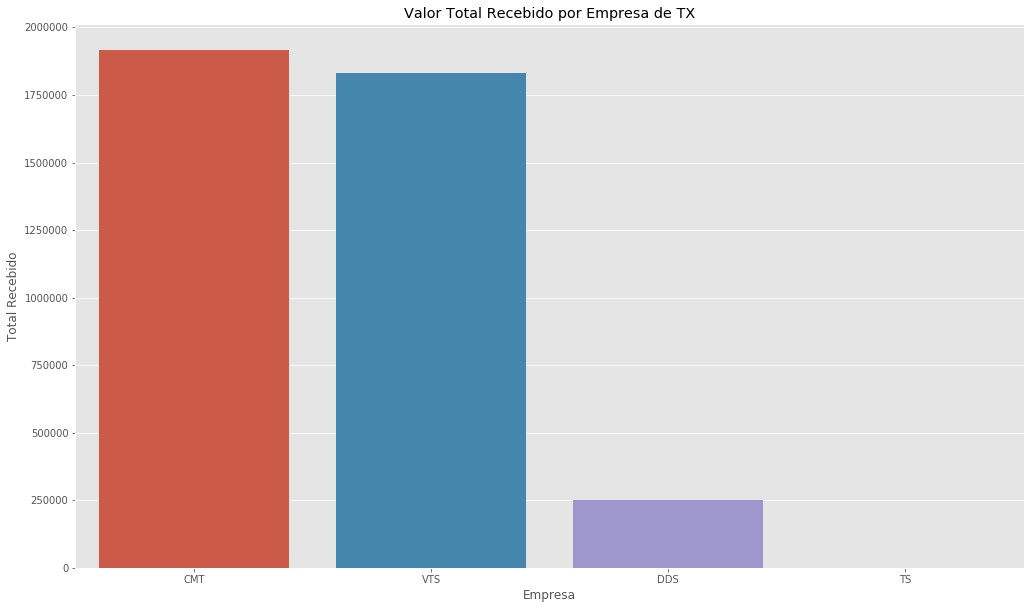

In [18]:
plt.figure(figsize=(17,10))
sns.countplot(x=q2['vendor_id'])
plot_chart('Empresa', 'Total Recebido', 'Valor Total Recebido por Empresa de TX')

Com os valores lidos e através do gráfico mostrado acima podemos afirmar que o maior *vendor* foi a empresa **Creative Mobile Technologies, LLC** com o valor total aproximado de **19.550.000,00**.

### Histograma mensal das corridas pagas em dinheiro
Para a terceira questão, faremos um histograma da distribuição mensal de corridas pagas em dinheiro.

Para realizar o histograma, deixaremos apenas as colunas de **payment_type** e utilizarei a coluna **dropoff_datetime** mas poderíamos utilizar a coluna de **pickup_datetime** também, porém minha escolha foi pelo fato de considerar o fim da corrida como a data do pagamento para a análise.

In [19]:
q3 = df4Years[['payment_type', 'dropoff_datetime']]
q3.head()

payment_type                  dropoff_datetime
0         Cash  2009-04-21T18:57:09.433767+00:00
1         Cash  2009-01-13T07:50:36.386011+00:00
2         CASH  2009-01-06T19:43:09.908429+00:00
3         CASH  2009-09-24T08:41:56.739991+00:00
4         CASH  2009-10-29T05:57:22.880174+00:00

In [20]:
q3.dtypes

payment_type        object
dropoff_datetime    object
dtype: object

Para conseguirmos trabalhar com os dado de data irei converter a coluna ***dropoff_datetime*** de um objeto para o formato *datetime* utilizando uma função da biblioteca Pandas.

In [21]:
q3['dropoff_datetime'] = pd.to_datetime(q3['dropoff_datetime'], format='%Y-%m-%d')
q3.dtypes

/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


payment_type                     object
dropoff_datetime    datetime64[ns, UTC]
dtype: object

In [22]:
q3['payment_type'].unique()

array(['Cash', 'CASH', 'Credit', 'CREDIT', 'No Charge', 'Dispute'],
      dtype=object)

In [23]:
payment_lookup = pd.read_csv('data-payment_lookup-csv.csv')
payment_lookup.head(18)

A               B
0   payment_type  payment_lookup
1            Cas            Cash
2            CAS            Cash
3            Cre          Credit
4            CRE          Credit
5            No        No Charge
6            Dis         Dispute
7           Cash            Cash
8           CASH            Cash
9         Credit          Credit
10        CREDIT          Credit
11     No Charge       No Charge
12       Dispute         Dispute
13           CRD          Credit
14           CSH            Cash
15           NOC       No Charge
16           DIS         Dispute
17           UNK         Unknown

Para facilitar a limpeza dos dados desnecessários, como os pagamentos que não foram feitos com dinheiro, irei padronizar os valores de Cash e CASH para um único valor que será *"Cash"* e depois remover todo o restante dos pagamentos.

In [24]:
q3['payment_type'] = q3['payment_type'].replace('CASH', 'Cash')
q3 = q3[q3['payment_type'] == 'Cash']
q3['payment_type'].unique()

/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['Cash'], dtype=object)

Faremos agora o histograma mensal das corridas pagas em dinheiro.

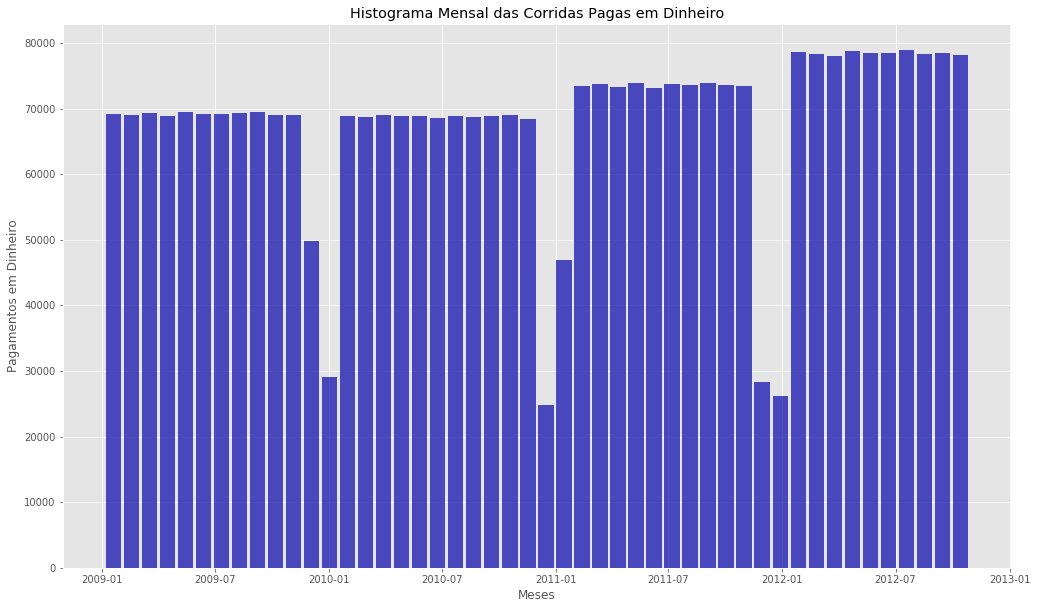

In [25]:
plt.figure(figsize=(17,10))
histogram = plt.hist(q3['dropoff_datetime'], bins=48, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plot_chart('Meses', 'Pagamentos em Dinheiro', 'Histograma Mensal das Corridas Pagas em Dinheiro')

### Série temporal da quantidade de gorjeta nos últimos 3 meses de 2012
Para resposta da quarta questão, iremos fazer um gráfico de série temporal contando a quantidade de gorjetas de cada dia nos últimos 3 meses de 2012.

Para fazer o gráfico de série temporal iremos deixar apenas as colunas de **dropoff_datetime** e **tip_amount**.

In [26]:
q4 = df2012[['dropoff_datetime', 'tip_amount']]
q4.head()

dropoff_datetime  tip_amount
0  2012-06-09T16:31:19.862787+00:00         0.0
1   2012-08-14T21:54:50.01863+00:00         0.0
2  2012-07-06T17:22:57.404442+00:00         0.0
3  2012-07-22T04:20:45.142945+00:00         0.0
4  2012-07-11T11:49:03.034108+00:00         0.0

Primeiramente, iremos fazer conforme a questão 3 e converter o tipo da coluna **dropoff_datetime** que está como objeto para o tipo de **data e hora(datetime)**. 

In [27]:
q4['dropoff_datetime'] = pd.to_datetime(q4['dropoff_datetime'], format='%Y-%m-%d')
q4['dropoff_datetime'].dt.month.sort_values().unique()

/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Precisamos agora isolar somente os dados dos últimos 3 meses (Agosto, Setembro e Outubro) de 2012 para iniciar a análise. Para facilitar na leitura farei um dicionário transformando os números 8, 9 e 10 dos meses da coluna *dropoff_datetime* em Agosto, Setembro e Outubro repectivamente em uma nova coluna que chamarei de Month. Irei separar os dias em uma nova coluna também para ficar mais fácil de juntar os dados em uma nova tabela e assim levantar a série temporal.

In [28]:
q4['Month'] = q4['dropoff_datetime'].dt.month
q4['Day'] = q4['dropoff_datetime'].dt.day
q4.head()

/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dropoff_datetime  tip_amount  Month  Day
0 2012-06-09 16:31:19.862787+00:00         0.0      6    9
1 2012-08-14 21:54:50.018630+00:00         0.0      8   14
2 2012-07-06 17:22:57.404442+00:00         0.0      7    6
3 2012-07-22 04:20:45.142945+00:00         0.0      7   22
4 2012-07-11 11:49:03.034108+00:00         0.0      7   11

In [29]:
q4 = q4[(q4['Month'] == 8) | (q4['Month'] == 9) | (q4['Month'] == 10)]
q4['Month'].unique()

array([ 8,  9, 10])

Precisamos agora organizar nosso dataframe para uma ordem crescente no tempo e assim criar nosso gráfico de série temporal.

In [30]:
time_serie = q4.groupby(['Month', 'Day']).sum()
time_serie

tip_amount
Month Day            
8     1       1269.22
      2       1474.27
      3       1302.93
      4       1327.41
      5       1287.89
      6       1300.02
      7       1499.12
      8       1358.35
      9       1328.64
      10      1370.48
      11      1306.29
      12      1289.20
      13      1218.87
      14      1303.16
      15      1371.81
      16      1457.17
      17      1371.48
      18      1370.15
      19      1375.48
      20      1296.99
      21      1357.48
      22      1308.61
      23      1390.30
      24      1378.83
      25      1191.32
      26      1328.51
      27      1420.50
      28      1327.24
      29      1439.23
      30      1461.54
...               ...
9     29      1270.60
      30      1426.59
10    1       1443.39
      2       1438.64
      3       1342.74
      4       1424.44
      5       1383.74
      6       1351.90
      7       1351.17
      8       1299.92
      9       1398.90
      10      1465.07
      11      1361.37
      12      1393.23
      13      1317.59
      14      1250.66
      15      1290.14
      16      1348.17
      17      1601.81
      18      1346.73
      19      1360.41
      20      1359.77
      21      1545.28
      22      1365.51
      23      1429.35
      24      1226.09
      25      1259.90
      26      1406.14
      27      1217.26
      28         3.10

[89 rows x 1 columns]

<Figure size 1224x720 with 0 Axes>

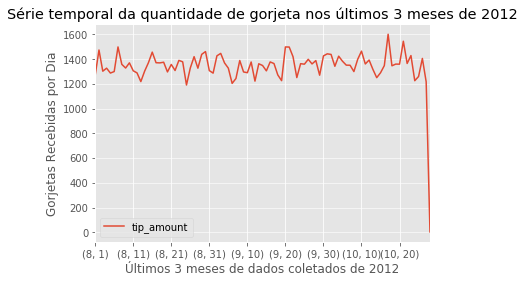

In [31]:
plt.figure(figsize=(17,10))
time_serie.plot()
plt.grid(axis='y', alpha=0.75)
plot_chart('Últimos 3 meses de dados coletados de 2012', 'Gorjetas Recebidas por Dia', 'Série temporal da quantidade de gorjeta nos últimos 3 meses de 2012')

## Análises Extras 

### Tempo médio das corridas nos dias de sábado e domingo
Para iniciar as respostas da questões bônus, irei utilizar as mesmas bases utilizadas nas questões anteriores.

Como queremos achar o tempo médio das corridas nos dias de sábado e domingo, precisarei tratar o dataframe para facilitar a análise. Irei deixar somente as colunas ***pickup_datetime e dropoff_datetime*** no novo dataframe que chamarei de **bonus1**.

In [32]:
bonus1 = df4Years[['pickup_datetime', 'dropoff_datetime']]
bonus1.head()

pickup_datetime                  dropoff_datetime
0  2009-04-21T18:51:11.767205+00:00  2009-04-21T18:57:09.433767+00:00
1  2009-01-13T07:40:07.639754+00:00  2009-01-13T07:50:36.386011+00:00
2  2009-01-06T19:30:44.142187+00:00  2009-01-06T19:43:09.908429+00:00
3  2009-09-24T08:28:09.004451+00:00  2009-09-24T08:41:56.739991+00:00
4  2009-10-29T05:50:39.214629+00:00  2009-10-29T05:57:22.880174+00:00

Irei primeiramente transformar as duas colunas no formato *datetime*. 

In [33]:
bonus1['dropoff_datetime'] = pd.to_datetime(bonus1['dropoff_datetime'], format='%Y-%m-%d')
bonus1['pickup_datetime'] = pd.to_datetime(bonus1['pickup_datetime'], format='%Y-%m-%d')

/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Criarei uma nova coluna com os dias da semana e depois retirar todos as *entries* que não são referentes aos dias sábado e domingo. 

In [34]:
bonus1['weekday'] = bonus1['dropoff_datetime'].dt.weekday_name
bonus1.head()

/home/xaleh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


pickup_datetime                 dropoff_datetime   weekday
0 2009-04-21 18:51:11.767205+00:00 2009-04-21 18:57:09.433767+00:00   Tuesday
1 2009-01-13 07:40:07.639754+00:00 2009-01-13 07:50:36.386011+00:00   Tuesday
2 2009-01-06 19:30:44.142187+00:00 2009-01-06 19:43:09.908429+00:00   Tuesday
3 2009-09-24 08:28:09.004451+00:00 2009-09-24 08:41:56.739991+00:00  Thursday
4 2009-10-29 05:50:39.214629+00:00 2009-10-29 05:57:22.880174+00:00  Thursday

In [35]:
bonus1 = bonus1[(bonus1['weekday'] == 'Saturday') | (bonus1['weekday'] == 'Sunday')]
bonus1['weekday'].unique()

array(['Saturday', 'Sunday'], dtype=object)

Precisamos agora achar o tempo de cada viagem. Para isso, criarei uma nova coluna com a diferença de horário entre o *dropoff_datetime* e *pickup_datetime* com o resultado passado em **minutos**.

In [36]:
bonus1['time_trip'] = bonus1['dropoff_datetime'] - bonus1['pickup_datetime']
bonus1['time_trip'] = bonus1['time_trip']/np.timedelta64(1,'m')
bonus1.head()

pickup_datetime                 dropoff_datetime  \
10 2009-06-27 16:40:08.347535+00:00 2009-06-27 16:51:08.733720+00:00   
15 2009-02-08 06:32:17.418097+00:00 2009-02-08 06:41:08.813183+00:00   
23 2009-12-06 23:41:19.847717+00:00 2009-12-06 23:50:12.801402+00:00   
25 2009-10-10 00:27:01.184045+00:00 2009-10-10 00:37:46.033325+00:00   
26 2009-05-02 18:38:09.434373+00:00 2009-05-02 18:47:17.076487+00:00   

     weekday  time_trip  
10  Saturday  11.006436  
15    Sunday   8.856585  
23    Sunday   8.882561  
25  Saturday  10.747488  
26  Saturday   9.127369

In [37]:
bonus1['time_trip'].mean()

8.746458080846166

Temos então que o tempo médio das corridas feitas nos dias sábado e domingo foram de **8,7 minutos**.

In [38]:
bonus1 = bonus1[['weekday', 'time_trip']]
bonus1.head()

weekday  time_trip
10  Saturday  11.006436
15    Sunday   8.856585
23    Sunday   8.882561
25  Saturday  10.747488
26  Saturday   9.127369

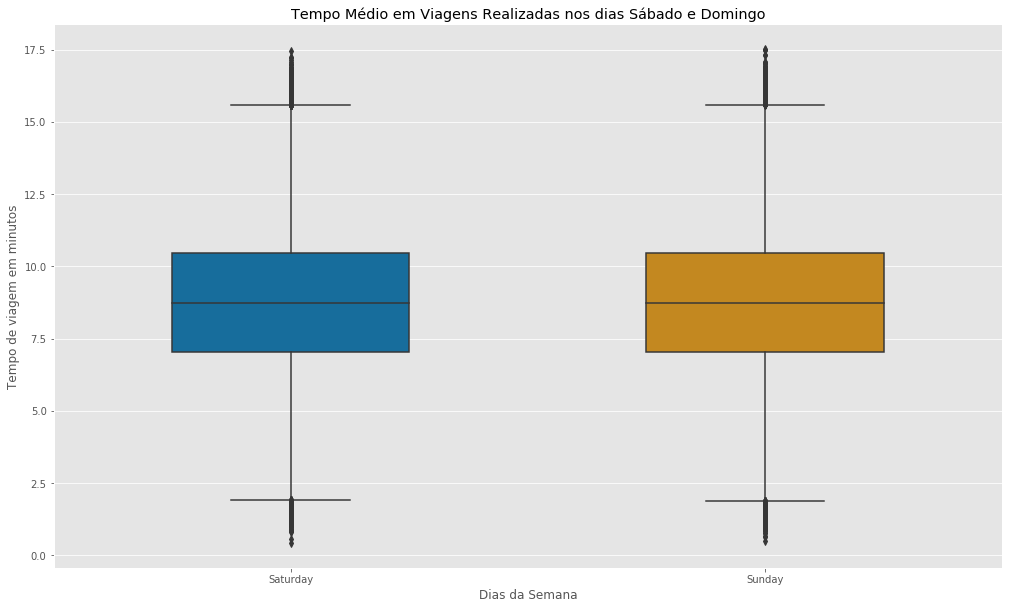

In [39]:
plt.figure(figsize=(17,10))
sns.boxplot(y='time_trip',
            x='weekday',
            data=bonus1,
            palette="colorblind",
            width=0.5)
plot_chart('Dias da Semana', 'Tempo de viagem em minutos', 'Tempo Médio em Viagens Realizadas nos dias Sábado e Domingo')

### Mapa com os *pickups e dropoffs* no ano de 2010
Para criar uma vizualização em mapa com as posições geográficas de *pickups e dropoffs* no ano de 2010, começarei criando um dataframe, chamado de bonus2, somente com as colunas **pickup_latitude, pickup_longitude, dropoff_latitude e dropoff_longitude**.

In [40]:
bonus2 = df2010[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
bonus2.head()

pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude
0        40.742950        -74.004114         40.747950         -73.994712
1        40.747784        -73.996506         40.792385         -73.940449
2        40.752070        -73.951340         40.768108         -73.944535
3        40.729128        -74.001117         40.721812         -73.958122
4        40.756873        -73.976600         40.776075         -73.979757

Para conseguirmos a visualização no mapa, precisarei importar a biblioteca *Plotly*.

In [60]:
import chart_studio.plotly as py
import plotly.graph_objects as go

mapbox_access_token = 'pk.eyJ1IjoieGFsZWgiLCJhIjoiY2p6Y25qazU3MDBneTNtcGx5Yml0ZzVidSJ9.TjdmVMM8Oq2Te-snPRZ9UQ'

Para começar vou utilizar o ScatterGeo para gerar os pontos. Começarei colocando os pontos de *pickup* e depois adicionarei os de *dropoff*.

Devido a limitações do Jupyter e do navegador, irei reduzir para apenas as 10 mil primeiras *entries*. Tive bastante problema tentando imprimir o gráfico com todos os pontos. 

In [51]:
pickup_lat = bonus2.loc[:10000, 'pickup_latitude']
pickup_lon = bonus2.loc[:10000, 'pickup_longitude']
dropoff_lat = bonus2.loc[:10000, 'dropoff_latitude']
dropoff_lon = bonus2.loc[:10000, 'dropoff_longitude']

In [58]:
data = [
    go.Scattermapbox(
                      lon = pickup_lon,
                      lat = pickup_lat,
                      name = 'Entrada do Passageiro',
                      mode = 'markers',
                      marker = dict(color = 'gold',size = 4, opacity = 0.5)),
    go.Scattermapbox(
                      lon = dropoff_lon,
                      lat = dropoff_lat,
                      name = 'Saída do Passageiro',
                      mode = 'markers',
                      marker = dict(color = 'cyan',size = 4, opacity = 0.5))
]

layout = go.Layout(
                    title = '<b>Mapa de pickups em 2010</b>',
                    titlefont = {'family':'Arial','size': 24},
                    autosize = False,
                    showlegend = False,
                    mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 40.75, lon = -74),
                                 pitch = 0,
                                 zoom = 12,
                                 style = 'light'
                                 ),
                    width=900,
                    height=600)

fig = dict(data=data, layout=layout)

In [59]:
py.iplot(fig, filename='Pickups&Dropoffs_NYC_TX')

PlotlyRequestError: Authentication credentials were not provided.